## 1. Import Libraries for plotting data
matplotlib is the library in python for plotting the data. Plotting data is dependend on the dataframe. So you
need a dataframe before you plotting data. 

### Plotting tips
The power of presentating numbers is to keep it as simple as posible. Limit your self to the below guidelines
for creating insight.

- For categorical variables utilize Bar Charts* and Boxplots.
- For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.
- Use index for sorting and organizing your data structure

In [9]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Plotting Line Charts
Line Charts two axis where the y axis consist of numeric measures and the x axis can consist either on 
character or numeric range.

In the example below we create two series (X,y) and plot these series in a line graph.

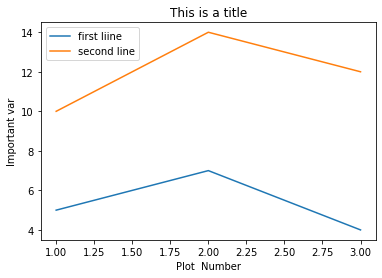

In [10]:
x = [1,2,3]
y=  [5,7,4]

x1 = [1,2,3]
y1 = [10,14,12]

plt.plot(x,y, label='first liine')
plt.plot(x1,y1, label='second line')


plt.xlabel('Plot  Number')
plt.ylabel('Important var')
plt.title('This is a title')
plt.legend()
plt.show()

### 2.1 Read CSV to line chart
We now read a file, filter this for only Albany and plot this as an linechart. We use the date for the x as and the y for the AveragePrice

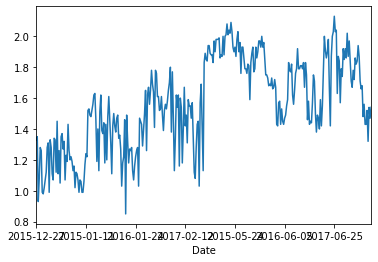

In [8]:
df = pd.read_csv("avocado.csv")

albany_df = df[df['region']=="Albany"]
albany_df.set_index("Date", inplace=True)

albany_df["AveragePrice"].plot()


### 2.2 Format the date 
Set the index on the date and format it so it is readable 

In [11]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


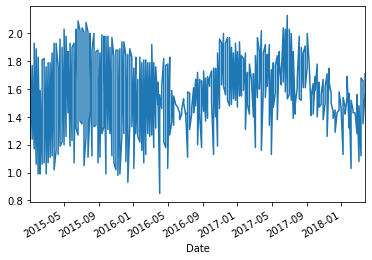

In [12]:
df = pd.read_csv("avocado.csv")

df['Date'] = pd.to_datetime(df['Date'])
albany_df = df[df['region']=="Albany"]
albany_df.set_index("Date", inplace=True)

albany_df["AveragePrice"].plot()

### 3. Histograms
With the histogram you can get insight about how the data is distibuted over the x axis.

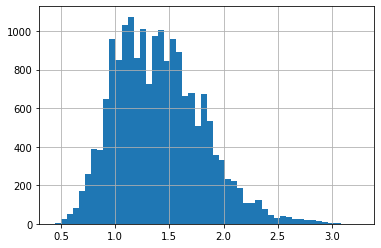

In [97]:
df["AveragePrice"].hist(bins=50)

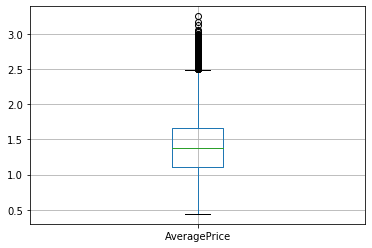

In [13]:
df.boxplot(column='AveragePrice')

## 4. Pivoting
Now we have produced nice visualizations it time to make it more difficult. What if we wan't to have an *AveragePrice* per *region*. And create an line char with a serie per region.

The solutions for this problem is to pivot the (making columns of rows) and put the AveragePrice to the region. With python we use theirfor the following functions.

1. empty dataframe
2. unique() to create an unique list of values
3. Loop
4. Switch on conditions
5. sort_index()

Let break the problem step by step and explain why we need these steps:


### 4.1 Duplicate data
In the current DataFrame differs in detail level then what we needed. When we slice the data 
on the column *region* we see that the values are not unique in the list.

In [14]:
df['region']

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [15]:
# Make an unique list of regions
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### 4.2 Loops
To iterate through each value you need a loop function. An loop function asses each value in the list untill they reach the end the list.

**syntax**
*for* [row variabe] in [list]

** example**
for test in [1,2,3,4]:
    print(test)


In [3]:
list = 'Apple','Lemon','banana'
for test in list:
    print(test)

Apple
Lemon
banana


### 4.3 Conditions/ Switch
A condition is logical test which is true or false. For example your wan't to test if a variable in the list 
is empty and if the variabele is empty you wan't to set it to NaN

***Syntax***

if [condition] :
    [action]
else:
    [action]
    



In [14]:
fruitpieces = 3

if fruitpieces < 2:
    print('fruit is les than 2')
else:
    print('fruit is more than 2')

fruit is more than 2


### Wrap it al up
Now we are combining the ***switch*** and the ***loop*** to create an pivot table. With the ***copy()*** function you copy the column to an other DataFrame. The rolling(25).mean calculate the rolling mean for the column region. We are using the switch to deside if the new pivot_table is empty. If empty then add the new region column to the dataset else copy the new region columnm to the existing DataFrame.

In [2]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("avocado.csv")
pivot_table = pd.DataFrame()

regionlist = df['region'].unique()[:16]
for region in regionlist:
    region_df = df.copy()[df['region']== region]
    region_df.set_index('Date', inplace = True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25Ma"] = region_df['AveragePrice'].rolling(25).mean()
    
    if pivot_table.empty:
        pivot_table = region_df[[f"{region}_price25Ma"]]
    else:
        pivot_table = pivot_table.join(region_df[f"{region}_price25Ma"])

pivot_table.tail()

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


,Albany_price25Ma,Atlanta_price25Ma,BaltimoreWashington_price25Ma,Boise_price25Ma,Boston_price25Ma,BuffaloRochester_price25Ma,California_price25Ma,Charlotte_price25Ma,Chicago_price25Ma,CincinnatiDayton_price25Ma,Columbus_price25Ma,DallasFtWorth_price25Ma,Denver_price25Ma,Detroit_price25Ma,GrandRapids_price25Ma,GreatLakes_price25Ma
Date,,,,,,,,,,,,,,,,
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1492,1.3264,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2788


The above dataset still has more rows per day and is theirfor not useable for plotting. This is because our avocados have multiple prices. Organic and Conventional. So lets 
pick one.

In [15]:
df = df.copy()[df['type'] == 'organic']
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
11205,51,2015-01-04,1.39,4414.29,56.21,2760.82,0.00,1597.26,1139.42,457.84,0.0,organic,2015,Roanoke
9801,51,2015-01-04,1.42,22480.07,3199.35,6916.72,7.56,12356.44,1076.67,11279.77,0.0,organic,2015,Denver
11309,51,2015-01-04,1.23,19089.36,17522.46,735.22,2.87,828.81,828.81,0.00,0.0,organic,2015,SanDiego
9957,51,2015-01-04,1.54,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.0,organic,2015,GreatLakes


In [7]:
pivot_table = pd.DataFrame()
regionlist = df['region'].unique()[:16]
for region in regionlist:
    region_df = df.copy()[df['region']== region]
    region_df.set_index('Date', inplace = True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25Ma"] = region_df['AveragePrice'].rolling(25).mean()
    
    if pivot_table.empty:
        pivot_table = region_df[[f"{region}_price25Ma"]]
    else:
        pivot_table = pivot_table.join(region_df[f"{region}_price25Ma"])

pivot_table.tail()

,California_price25Ma,LasVegas_price25Ma,PhoenixTucson_price25Ma,BuffaloRochester_price25Ma,Spokane_price25Ma,LosAngeles_price25Ma,Philadelphia_price25Ma,Boston_price25Ma,StLouis_price25Ma,Louisville_price25Ma,Orlando_price25Ma,Southeast_price25Ma,Boise_price25Ma,MiamiFtLauderdale_price25Ma,NorthernNewEngland_price25Ma,BaltimoreWashington_price25Ma
Date,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,1.8728,1.7116,2.0512,1.7140,1.6280,1.5836
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,1.8512,1.6868,2.0176,1.7068,1.6224,1.5772
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,1.8004,1.6484,1.9836,1.6904,1.6264,1.5732
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,1.7712,1.6156,1.9520,1.6692,1.6284,1.5684
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,1.7352,1.5820,1.9128,1.6392,1.6312,1.5568


Now lets plot these data

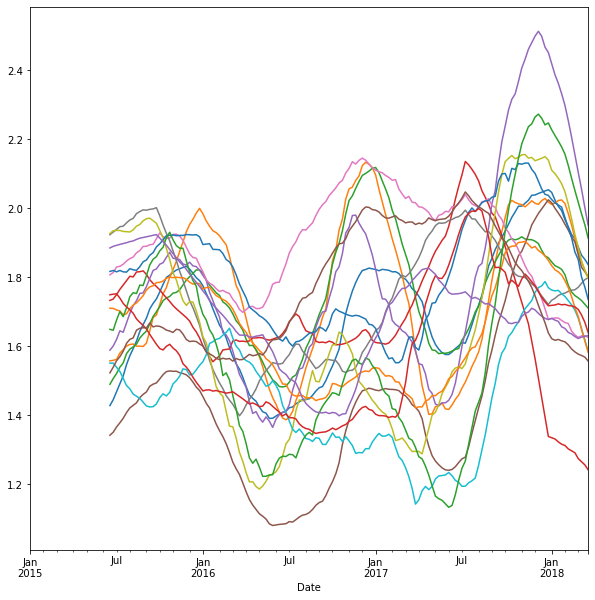

In [13]:
pivot_table.plot(figsize=(10,10),legend=False)